In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos, sin, abs

In [10]:
# Display of the transmission pattern of the parabolic antenna to another parabolic antenna at a distance of 18m. 
# The power density is calculated and plotted as a contour plot. 


In [11]:
Z0 = 120*pi # Impedance of free space
I0 = 1 # Current amplitude at the feed point of the antenna
lam = 1e-3 # Wavelength of the signal
L = lam / 2  # Length of the antenna
k = 2 * pi / lam

theta = np.linspace(0, pi, 1000) # Angle from the antenna axis (0 to 180 degrees)
r = np.linspace(0.1, 20, 1000)
T, R = np.meshgrid(theta, r)

eps = 1e-9 # Small value to prevent division by zero
Pr = (Z0 * I0**2 / (2 * pi * R)**2) * ((cos(k*L/2 * cos(T)) - cos(k*L/2)) / (np.sin(T) + eps))**2 # Power density of the antenna radiation pattern
Z = R * np.sin(T)
X = R * np.cos(T)

Pr_dB = 10 * np.log10(Pr / np.max(Pr) + eps)

Pt = 2 * pi * np.trapezoid(Pr[-1,:] * np.max(r)**2 * sin(theta), theta) # Total power radiated by the antenna
print(f"Total Power Radiated by the Antenna: {Pt:.4f} W")
Rrad = 2 * Pt / I0**2 # Radiation resistance of the antenna
print(f"Radiation Resistance of the Antenna: {Rrad:.2f} Ohms")


Total Power Radiated by the Antenna: 73.1296 W
Radiation Resistance of the Antenna: 146.26 Ohms


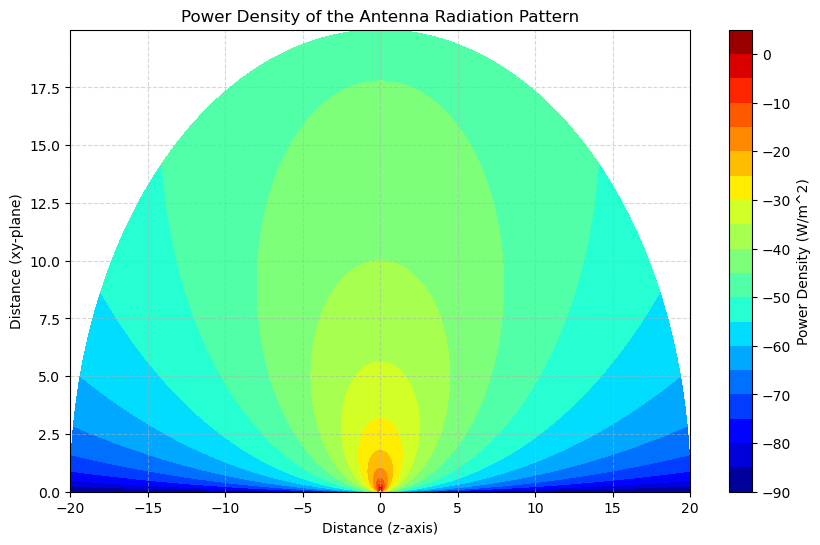

In [12]:
plt.figure(1, figsize=(10, 6))
plt.contourf(X, Z, Pr_dB, levels=20, cmap='jet')
plt.colorbar(label='Power Density (W/m^2)')
plt.xlabel('Distance (z-axis)')
plt.ylabel('Distance (xy-plane)')
plt.title('Power Density of the Antenna Radiation Pattern')
plt.grid(True, axis='both', linestyle='--', alpha=0.5)
plt.show()


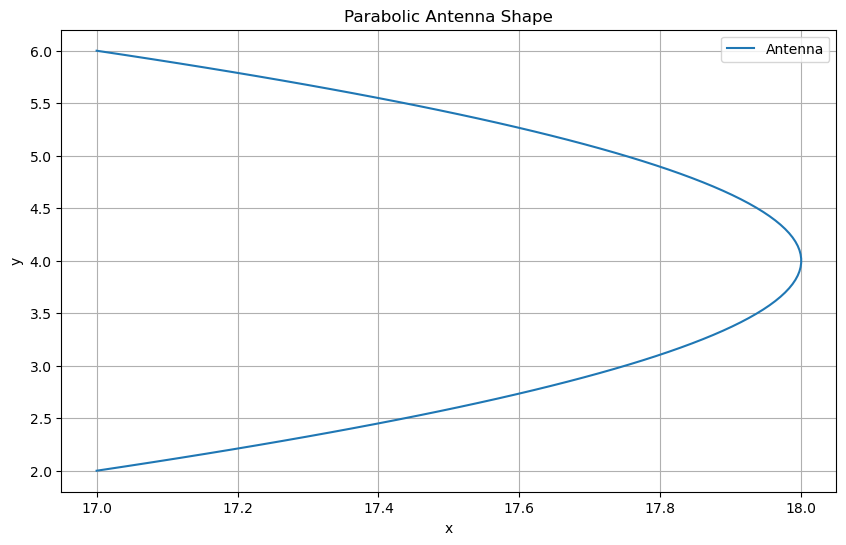

In [13]:
antennaY1 = np.linspace(-2, 2, 100) + 4
antennaX1 = 2 + 0.25*(antennaY1 - 4)**2

antennaY2 = np.linspace(-2, 2, 100) + 4
antennaX2 = 18 + -0.25*(antennaY1 - 4)**2

plt.figure(2, figsize=(10, 6))
plt.plot(antennaX2, antennaY2, label='Antenna')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parabolic Antenna Shape')
plt.grid(True)
plt.legend()
plt.show()  

In [14]:
idxR = np.argmin(np.abs(r - 18))
idxT = np.argmin(np.abs(theta - pi/2)) # theta = 90 degrees (broadside direction)

power_density_received = Pr[idxR, idxT]

dia = 4
aperture_area = pi * (dia/2)**2
aperature_efficiency = 0.55 # Typical efficiency for a parabolic antenna
effective_area = aperature_efficiency * aperture_area

power_received = power_density_received * effective_area
print(f"Total Power Captured: {power_received:.4e} W")

Total Power Captured: 2.0352e-01 W


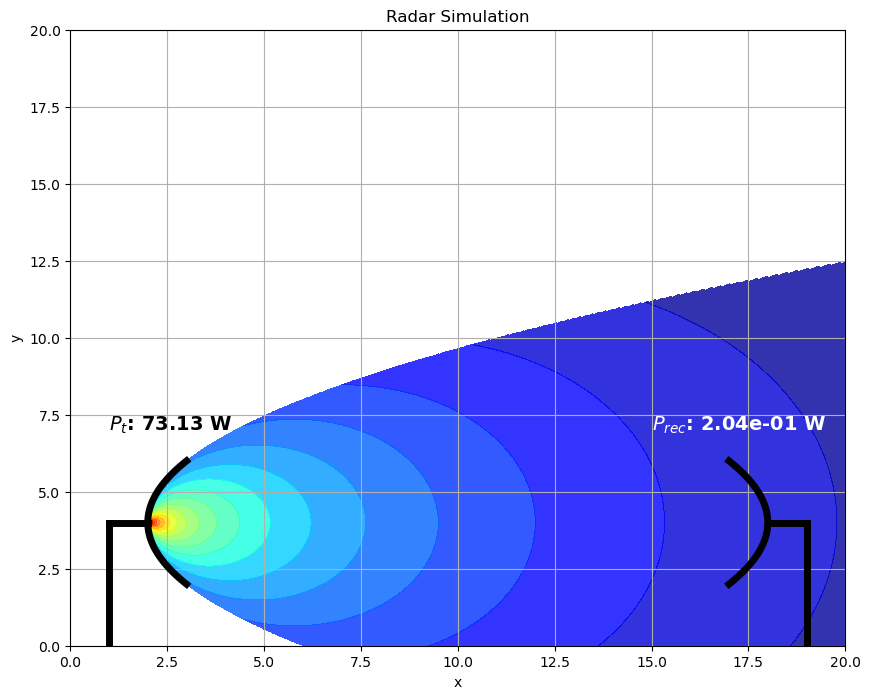

In [15]:
xsim = [0,20]
ysim = [0,20]

# Boundary condition
mask = (Z + 2) >= (2 + 0.25 * (X + 4 - 4)**2)
Pr_masked = np.where(mask, Pr_dB, np.nan)

plt.figure(3, figsize=(10, 8))

# Parabolic Antennas
plt.plot(antennaX1, antennaY1, 'k-',label='Antenna', linewidth=5)
plt.plot(antennaX2, antennaY2, 'k-',label='Antenna', linewidth=5)
plt.plot([19,19], [0,4], 'k', linewidth=5) # [x1, x2], [y1, y2]
plt.plot([1,1], [0,4], 'k', linewidth=5) 
plt.plot([1,2], [4,4], 'k', linewidth=5)
plt.plot([18,19], [4,4], 'k', linewidth=5)

# Power Density with Boundary Condition
plt.contourf(Z + 2, X + 4, Pr_masked, levels=20, cmap='jet', alpha=0.8)

# Transmitted Power
plt.text(1, 7, f'$P_t$: {Pt:.2f} W', color='black', fontweight='bold', fontsize=14)

# Received Power
plt.text(15, 7, f'$P_{{rec}}$: {power_received:.2e} W', color='white', fontweight='bold', fontsize=14)

plt.xlim(xsim)
plt.ylim(ysim)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Radar Simulation')
plt.grid(True)

plt.show()  